# Realizando as primeiras consultas

Bibliotecas utilizadas:

pandas==2.2.2

llama-index==0.11.20

llama-index-llms-groq==0.2.0

llama-index-experimental==0.4.0

gradio==5.4.0

fpdf==1.7.2

In [1]:
url = 'https://raw.githubusercontent.com/alura-cursos/llamaIndex_pandas_query/refs/heads/main/Dados/vendas.csv'

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

ID_compra filial       cidade tipo_cliente     genero       tipo_produto  \
0  750-67-8428      A  Santo Andr√©       Membro   Feminino     Sa√∫de e Beleza   
1  226-31-3081      C  S√£o Caetano       Normal   Feminino        Eletr√¥nicos   
2  631-41-3108      A  Santo Andr√©       Normal  Masculino               Casa   
3  123-19-1176      A  Santo Andr√©       Membro  Masculino     Sa√∫de e Beleza   
4  373-73-7910      A  Santo Andr√©       Normal  Masculino  Esportes e Viagem   

   preco_unitario  quantidade  imposto_5%     total        data      hora  \
0           74.69           7     26.1415  548.9715  2024-01-05  13:08:00   
1           15.28           5      3.8200   80.2200  2024-03-08  10:29:00   
2           46.33           7     16.2155  340.5255  2024-03-03  13:23:00   
3           58.22           8     23.2880  489.0480  2024-01-27  20:33:00   
4           86.31           7     30.2085  634.3785  2024-02-08  10:37:00   

     forma_pagamento  avaliacao  
0   Carteira Digital        9.1  
1           Dinheiro        9.6  
2  Cart√£o de Cr√©dito        7.4  
3   Carteira Digital        8.4  
4   Carteira Digital        5.3

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_compra        1000 non-null   object 
 1   filial           1000 non-null   object 
 2   cidade           1000 non-null   object 
 3   tipo_cliente     1000 non-null   object 
 4   genero           1000 non-null   object 
 5   tipo_produto     1000 non-null   object 
 6   preco_unitario   1000 non-null   float64
 7   quantidade       1000 non-null   int64  
 8   imposto_5%       1000 non-null   float64
 9   total            1000 non-null   float64
 10  data             1000 non-null   object 
 11  hora             1000 non-null   object 
 12  forma_pagamento  1000 non-null   object 
 13  avaliacao        1000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


In [6]:
df.duplicated().sum()

0

# Definindo a LLM e configurando a Chave de API

In [7]:
# Aqui faremos a instala√ß√£o do Llama, e utilizamos a fun√ß√£o -q no final para ele resumir as notifica√ß√µes de instala√ß√£o

!pip install llama-index llama-index-experimental -q

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 81.3/81.3 kB 2.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.6/1.6 MB 24.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 40.4/40.4 kB 2.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 261.7/261.7 kB 17.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 302.0/302.0 kB 20.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.2/1.2 MB 29.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

In [8]:
# Aqui vamos usar uma ferramenta gratuita, dispon√≠vel pela ferramenta Groq
# Essa chave fica armazenada dentro da aba de secrets do Colab

from google.colab import userdata
key = userdata.get('grop_api_key')

In [9]:
# Vamos instalar a biblioteca para usar o Groq

!pip install llama-index-llms-groq -q

In [10]:
# Definindo o modelo de linguagem, vamos usar o de 70 bilh√µes de par√¢metros

from llama_index.core import Settings
from llama_index.llms.groq import Groq

Settings.llm = Groq(model='llama3-70b-8192', api_key=key)

In [11]:
# Vamos importar o query engine para poder trabalhar com as queries

from llama_index.experimental.query_engine import PandasQueryEngine

In [12]:
# Aqui vamos definir o nosso query engine

query_engine = PandasQueryEngine(df=df, verbose=True)

In [13]:
# Aqui vamos fazer a nossa primeira pergunta
# Como vamos observar na resposta, ele vai nos passar o c√≥digo utilizado e a resposta em seguida

response = query_engine.query('Qual √© a forma de pagamento mais utilizada pelos cliente?')

> Pandas Instructions:
```
df['forma_pagamento'].value_counts().index[0]
```
> Pandas Output: Carteira Digital


In [14]:
# Podemos copiar o c√≥digo acima, para verificar se ele realmente funciona

df.forma_pagamento.value_counts().index[0]

'Carteira Digital'

In [15]:
# Agora uma pergunta um pouco mais complexa

response = query_engine.query('Qual o tipo de produto com maior quantidade por filial?')

> Pandas Instructions:
```
df.groupby(['filial', 'tipo_produto'])['quantidade'].sum().groupby('filial').idxmax()
```
> Pandas Output: filial
A                   (A, Casa)
B      (B, Esportes e Viagem)
C    (C, Alimentos e Bebidas)
Name: quantidade, dtype: object


In [16]:
df.groupby(['filial', 'tipo_produto'])['quantidade'].sum().groupby('filial').idxmax()

filial
A                   (A, Casa)
B      (B, Esportes e Viagem)
C    (C, Alimentos e Bebidas)
Name: quantidade, dtype: object

In [17]:
# Se pegarmos agora a nossa vari√°vel, podemos avaliar o passo a passo de como ela foi criada

response

Response(response='filial\nA                   (A, Casa)\nB      (B, Esportes e Viagem)\nC    (C, Alimentos e Bebidas)\nName: quantidade, dtype: object', source_nodes=[], metadata={'pandas_instruction_str': "df.groupby(['filial', 'tipo_produto'])['quantidade'].sum().groupby('filial').idxmax()", 'raw_pandas_output': 'filial\nA                   (A, Casa)\nB      (B, Esportes e Viagem)\nC    (C, Alimentos e Bebidas)\nName: quantidade, dtype: object'})

In [18]:
# Outro jeito de visualizar a resposta

print(response.response)

filial
A                   (A, Casa)
B      (B, Esportes e Viagem)
C    (C, Alimentos e Bebidas)
Name: quantidade, dtype: object


In [19]:
response = query_engine.query('Qual √© a forma de pagamento mais utilizada pelos clientes em cada filial?')

> Pandas Instructions:
```
df.groupby('filial')['forma_pagamento'].value_counts().groupby('filial').idxmax()
```
> Pandas Output: filial
A    (A, Carteira Digital)
B    (B, Carteira Digital)
C            (C, Dinheiro)
Name: count, dtype: object


In [20]:
# Agora vamos trabalhar para ter respostas mais detalhadas com o par√¢metro synthesize_response

query_engine = PandasQueryEngine(df=df, verbose=True, synthesize_response=True)

In [21]:
# Agora temos um texto descritivo no final

response = query_engine.query('Qual a avalia√ß√£o m√©dia de cada filial?')
print(str(response))

> Pandas Instructions:
```
df.groupby('filial')['avaliacao'].mean()
```
> Pandas Output: filial
A    7.027059
B    6.818072
C    7.072866
Name: avaliacao, dtype: float64
A avalia√ß√£o m√©dia de cada filial √© a seguinte: a filial A tem uma avalia√ß√£o m√©dia de 7.03, a filial B tem uma avalia√ß√£o m√©dia de 6.82 e a filial C tem uma avalia√ß√£o m√©dia de 7.07.


In [22]:
# Vamos formatar melhor o texto das respostas

import textwrap

def formatar_texto(response):
  texto = response.response
  texto_formatado = textwrap.fill(texto, width=100)
  print(texto_formatado)

In [23]:
formatar_texto(response)

A avalia√ß√£o m√©dia de cada filial √© a seguinte: a filial A tem uma avalia√ß√£o m√©dia de 7.03, a filial
B tem uma avalia√ß√£o m√©dia de 6.82 e a filial C tem uma avalia√ß√£o m√©dia de 7.07.


In [24]:
# Gerando gr√°ficos com o pandas query engine

response = query_engine.query('Me mostre a distribui√ß√£o das avalia√ß√µes')

> Pandas Instructions:
```
df['avaliacao'].value_counts()
```
> Pandas Output: avaliacao
6.0     26
6.6     24
4.2     22
9.5     22
6.5     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: count, Length: 61, dtype: int64


In [25]:
formatar_texto(response)

A distribui√ß√£o das avalia√ß√µes √© a seguinte: a avalia√ß√£o mais comum √© 6.0, que aparece 26 vezes,
seguida de 6.6, que aparece 24 vezes. Em seguida, temos 4.2 e 9.5, que aparecem 22 vezes cada. A
distribui√ß√£o apresenta uma variedade de avalia√ß√µes, com 61 valores √∫nicos.


> Pandas Instructions:
```
df.avaliacao.plot(kind='hist')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)


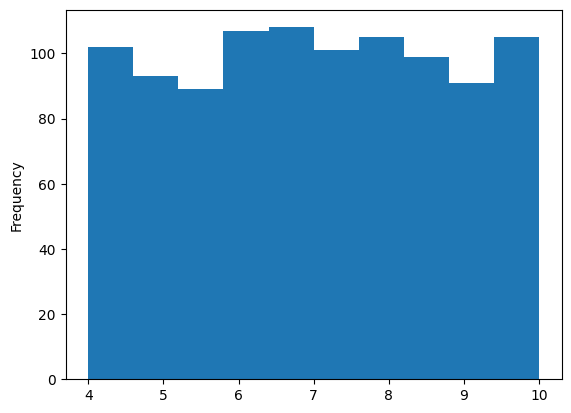

In [26]:
# Para gerar o gr√°fico, precisamos ser mais espec√≠ficos

response = query_engine.query('Me mostre o gr√°fico distribui√ß√£o das avalia√ß√µes')

In [27]:
formatar_texto(response)

Here is a synthesized response:  "Here is the histogram distribution of the evaluations:  [Insert
histogram graph here]  This graph shows the frequency of each evaluation score, providing a visual
representation of the distribution of ratings.


> Pandas Instructions:
```
df.groupby('tipo_produto')['total'].sum().sort_values().plot(kind='barh')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)


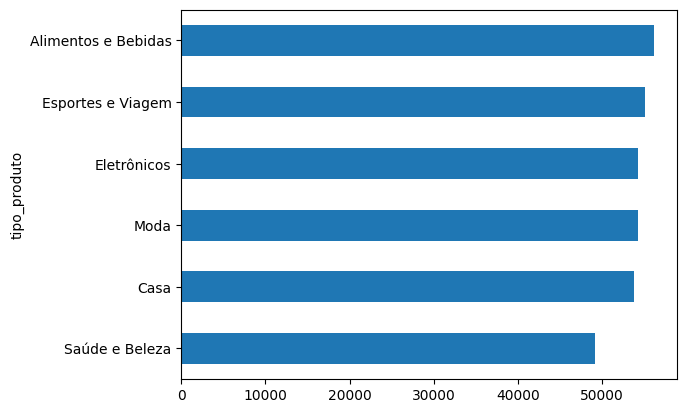

In [28]:
# Gerando um gr√°fico mais complexo

response = query_engine.query('Voc√™ pode plotar o valor total por tipo de produto, ordenado do menor para o maior e mantendo as barras na horizontal?')

In [29]:
formatar_texto(response)

Sim, √© poss√≠vel plotar o valor total por tipo de produto, ordenado do menor para o maior e mantendo
as barras na horizontal. Voc√™ pode usar o seguinte c√≥digo Pandas:
`df.groupby('tipo_produto')['total'].sum().sort_values().plot(kind='barh')`  Isso ir√° agrupar os
dados por tipo de produto, calcular a soma do valor total para cada grupo, ordenar os resultados do
menor para o maior e criar um gr√°fico de barras horizontal. O resultado ser√° um gr√°fico que mostra o
valor total por tipo de produto, com as barras na horizontal e ordenadas do menor para o maior.


> Pandas Instructions:
```
df.groupby('tipo_produto')['total'].sum().sort_values().plot(kind='barh')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)


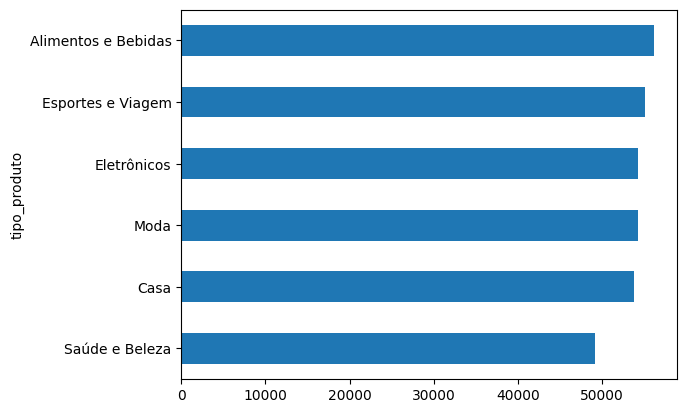

In [30]:
response = query_engine.query('Plote o valor total por tipo de produto, ordenado do menor para o maior e mantendo as barras na horizontal')

In [31]:
# Quando n√£o fazemos uma pergunta, o modelo pode se perder e trazer uma resposta em ingl√™s

formatar_texto(response)

Here is a synthesized response based on the query results:  "The plot shows the total value by type
of product, ordered from smallest to largest, with horizontal bars. The x-axis represents the total
value, and the y-axis lists the different types of products. The horizontal bars are arranged in
ascending order of their total values, allowing for easy comparison between products."


In [32]:
# Como podemos ver, ele mant√©m a resposta em ingl√™s

response = query_engine.query('Qual √© o m√©todo de pagamento mais utilizado em cada filial?')

print(response.response)

> Pandas Instructions:
```
df.groupby('filial')['forma_pagamento'].value_counts().groupby('filial').idxmax()
```
> Pandas Output: filial
A    (A, Carteira Digital)
B    (B, Carteira Digital)
C            (C, Dinheiro)
Name: count, dtype: object
Based on the query results, here is a synthesized response:

O m√©todo de pagamento mais utilizado em cada filial √©: 
- Na filial A, √© a Carteira Digital.
- Na filial B, √© a Carteira Digital.
- Na filial C, √© o Dinheiro.


In [33]:
# Pedir para ele responder um portugu√™s resolve o problema, por√©m n√£o √© muito pr√°tico fazer isso todas as vezes.

response = query_engine.query('Qual √© o m√©todo de pagamento mais utilizado em cada filial? Responda em portugu√™s BR')

print(response.response)

> Pandas Instructions:
```
df.groupby('filial')['forma_pagamento'].value_counts().groupby('filial').idxmax()
```
> Pandas Output: filial
A    (A, Carteira Digital)
B    (B, Carteira Digital)
C            (C, Dinheiro)
Name: count, dtype: object
O m√©todo de pagamento mais utilizado em cada filial √©:

* Na filial A, o m√©todo mais utilizado √© a Carteira Digital.
* Na filial B, o m√©todo mais utilizado √© a Carteira Digital.
* Na filial C, o m√©todo mais utilizado √© o pagamento em Dinheiro.


# Construindo um pipeline

In [34]:
# Definindo as fun√ß√µes do pipeline

from llama_index.core import PromptTemplate
from llama_index.experimental.query_engine.pandas import PandasInstructionParser

In [35]:
# Fun√ß√£o para obter uma descri√ß√£o das colunas do DataFrame
# Usamos '\n' para pular linhas

def descricao_colunas(df):
  descricao = '\n'.join([f"`{col}`: {str(df[col].dtype)}" for col in df.columns])
  return 'Aqui est√£o os detalhes das colunas do DataFrame:\n' + descricao

# Instru√ß√µes para orientar o modelo a converter uma consulta em linguagem natural em c√≥digo Python execut√°vel com a biblioteca Pandas
instruction_str = (
    "1. Converta a consulta para c√≥digo Python execut√°vel usando Pandas.\n"
    "2. A linha final do c√≥digo deve ser uma express√£o Python que possa ser chamada com a fun√ß√£o `eval()`.\n"
    "3. O c√≥digo deve representar uma solu√ß√£o para a consulta.\n"
    "4. IMPRIMA APENAS A EXPRESS√ÉO.\n"
    "5. N√£o coloque a express√£o entre aspas.\n")

# Prompt que ser√° enviado ao modelo para que ela gere o c√≥digo Pandas desejado
pandas_prompt_str = (
    "Voc√™ est√° trabalhando com um dataframe do pandas em Python chamado `df`.\n"
    "{colunas_detalhes}\n\n"
    "Este √© o resultado de `print(df.head())`:\n"
    "{df_str}\n\n"
    "Siga estas instru√ß√µes:\n"
    "{instruction_str}\n"
    "Consulta: {query_str}\n\n"
    "Express√£o:"
)

# Prompt para guiar o modelo a sintetizar uma resposta com base nos resultados obtidos pela consulta Pandas
response_synthesis_prompt_str = (
   "Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados da consulta.\n"
   "Responda de forma natural, sem introdu√ß√µes como 'A resposta √©:' ou algo semelhante.\n"
   "Consulta: {query_str}\n\n"
   "Instru√ß√µes do Pandas (opcional):\n{pandas_instructions}\n\n"
   "Sa√≠da do Pandas: {pandas_output}\n\n"
   "Resposta:"
   "Ao final, exibir o c√≥digo usado para gerar a resposta, no formato: O c√≥digo utilizado foi {pandas_instructions}"
)

# M√≥dulo para obter as instru√ß√µes Pandas
pandas_prompt = PromptTemplate(pandas_prompt_str).partial_format(
    instruction_str=instruction_str, colunas_detalhes=descricao_colunas(df), df_str=df.head(5)
)
# M√≥dulo para executar as instru√ß√µes Pandas
pandas_output_parser = PandasInstructionParser(df)

# M√≥dulo para sintetizar a resposta
response_synthesis_prompt = PromptTemplate(response_synthesis_prompt_str)

# Modelo
llm = Groq(model='llama3-70b-8192', api_key=key)

In [36]:
from llama_index.core.query_pipeline import (QueryPipeline as QP, Link, InputComponent)

In [37]:
# Definindo os m√≥dulos do pipeline

qp = QP(
    modules = {
        "input": InputComponent(),
        "pandas_prompt": pandas_prompt,
        "llm1": llm,
        "pandas_output_parser": pandas_output_parser,
        "response_synthesis_prompt": response_synthesis_prompt,
        "llm2": llm
    },
    verbose=True
)

# Definindo a cadeia

qp.add_chain(["input", "pandas_prompt", "llm1", "pandas_output_parser"])

# Definindo os links

qp.add_links(
    [
        Link("input", "response_synthesis_prompt", dest_key="query_str"),

        Link("llm1", "response_synthesis_prompt", dest_key="pandas_instructions"),

        Link("pandas_output_parser", "response_synthesis_prompt", dest_key="pandas_output")
    ]
)
qp.add_link("response_synthesis_prompt", "llm2")

In [38]:
# Testando o nosso pypeline

response = qp.run(query_str='Qual √© a m√©dia gasta por cada tipo de cliente?')

> Running module input with input: 
query_str: Qual √© a m√©dia gasta por cada tipo de cliente?

> Running module pandas_prompt with input: 
query_str: Qual √© a m√©dia gasta por cada tipo de cliente?

> Running module llm1 with input: 
messages: Voc√™ est√° trabalhando com um dataframe do pandas em Python chamado `df`.
Aqui est√£o os detalhes das colunas do DataFrame:
`ID_compra`: object
`filial`: object
`cidade`: object
`tipo_cliente`: object
`...

> Running module pandas_output_parser with input: 
input: assistant: df.groupby('tipo_cliente')['total'].mean()

> Running module response_synthesis_prompt with input: 
query_str: Qual √© a m√©dia gasta por cada tipo de cliente?
pandas_instructions: assistant: df.groupby('tipo_cliente')['total'].mean()
pandas_output: tipo_cliente
Membro    327.791305
Normal    318.122856
Name: total, dtype: float64

> Running module llm2 with input: 
messages: Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos res

In [39]:
# Exibindo a resposta

texto = response.message.content
texto_formatado = textwrap.fill(texto, width=100)
print(texto_formatado)

A m√©dia gasta por cada tipo de cliente √© de R$ 327,79 para os clientes Membro e R$ 318,12 para os
clientes Normal.  O c√≥digo utilizado foi df.groupby('tipo_cliente')['total'].mean()


In [40]:
response = qp.run(query_str='Por que clientes tipo membro tem maior m√©dia de gastos?')

> Running module input with input: 
query_str: Por que clientes tipo membro tem maior m√©dia de gastos?

> Running module pandas_prompt with input: 
query_str: Por que clientes tipo membro tem maior m√©dia de gastos?

> Running module llm1 with input: 
messages: Voc√™ est√° trabalhando com um dataframe do pandas em Python chamado `df`.
Aqui est√£o os detalhes das colunas do DataFrame:
`ID_compra`: object
`filial`: object
`cidade`: object
`tipo_cliente`: object
`...

> Running module pandas_output_parser with input: 
input: assistant: df.loc[df['tipo_cliente'] == 'Membro', 'total'].mean()

> Running module response_synthesis_prompt with input: 
query_str: Por que clientes tipo membro tem maior m√©dia de gastos?
pandas_instructions: assistant: df.loc[df['tipo_cliente'] == 'Membro', 'total'].mean()
pandas_output: 327.7913053892216

> Running module llm2 with input: 
messages: Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados da consul

In [41]:
# Aqui podemos avaliar a capacidade de an√°lise do modelo

texto = response.message.content
texto_formatado = textwrap.fill(texto, width=100)
print(texto_formatado)

Os clientes tipo membro t√™m uma m√©dia de gastos de R$ 327,79, o que √© maior em compara√ß√£o aos outros
tipos de clientes. Isso pode ser devido a various raz√µes, como a lealdade e a confian√ßa que esses
clientes t√™m na marca, o que os leva a realizar compras mais frequentes e de maior valor. Al√©m
disso, os membros podem ter acesso a ofertas e descontos exclusivos, o que pode aumentar seu gasto
m√©dio.  O c√≥digo utilizado foi `df.loc[df['tipo_cliente'] == 'Membro', 'total'].mean()`


In [42]:
# Agora vamos usar a biblioteca gradio para criar o nosso frontend

!pip install gradio -q

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 46.2/46.2 MB 18.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 322.1/322.1 kB 21.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 94.9/94.9 kB 7.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11.3/11.3 MB 101.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 72.0/72.0 kB 6.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 62.3/62.3 kB 4.0 MB/s eta 0:00:00


In [43]:
# Pipeline de consulta
'''Fun√ß√£o para obter uma descri√ß√£o das colunas do DataFrame'''
def descricao_colunas(df):
    descricao = '\n'.join([f"`{col}`: {str(df[col].dtype)}" for col in df.columns])
    return "Aqui est√£o os detalhes das colunas do dataframe:\n" + descricao

'''Defini√ß√£o de m√≥dulos da pipeline'''
def pipeline_consulta(df):
    instruction_str = (
        "1. Converta a consulta para c√≥digo Python execut√°vel usando Pandas.\n"
        "2. A linha final do c√≥digo deve ser uma express√£o Python que possa ser chamada com a fun√ß√£o `eval()`.\n"
        "3. O c√≥digo deve representar uma solu√ß√£o para a consulta.\n"
        "4. IMPRIMA APENAS A EXPRESS√ÉO.\n"
        "5. N√£o coloque a express√£o entre aspas.\n")

    pandas_prompt_str = (
        "Voc√™ est√° trabalhando com um dataframe do pandas em Python chamado `df`.\n"
        "{colunas_detalhes}\n\n"
        "Este √© o resultado de `print(df.head())`:\n"
        "{df_str}\n\n"
        "Siga estas instru√ß√µes:\n"
        "{instruction_str}\n"
        "Consulta: {query_str}\n\n"
        "Express√£o:"
)

    response_synthesis_prompt_str = (
       "Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados da consulta.\n"
       "Responda de forma natural, sem introdu√ß√µes como 'A resposta √©:' ou algo semelhante.\n"
       "Consulta: {query_str}\n\n"
       "Instru√ß√µes do Pandas (opcional):\n{pandas_instructions}\n\n"
       "Sa√≠da do Pandas: {pandas_output}\n\n"
       "Resposta: \n\n"
       "Ao final, exibir o c√≥digo usado em para gerar a resposta, no formato: O c√≥digo utilizado foi `{pandas_instructions}`"
    )

    pandas_prompt = PromptTemplate(pandas_prompt_str).partial_format(
    instruction_str=instruction_str,
    df_str=df.head(5),
    colunas_detalhes=descricao_colunas(df)
)

    pandas_output_parser = PandasInstructionParser(df)
    response_synthesis_prompt = PromptTemplate(response_synthesis_prompt_str)

    '''Cria√ß√£o do Query Pipeline'''
    qp = QP(
        modules={
            "input": InputComponent(),
            "pandas_prompt": pandas_prompt,
            "llm1": llm,
            "pandas_output_parser": pandas_output_parser,
            "response_synthesis_prompt": response_synthesis_prompt,
            "llm2": llm,
        },
        verbose=True,
    )
    qp.add_chain(["input", "pandas_prompt", "llm1", "pandas_output_parser"])
    qp.add_links(
        [
            Link("input", "response_synthesis_prompt", dest_key="query_str"),
            Link("llm1", "response_synthesis_prompt", dest_key="pandas_instructions"),
            Link("pandas_output_parser", "response_synthesis_prompt", dest_key="pandas_output"),
        ]
    )
    qp.add_link("response_synthesis_prompt", "llm2")
    return qp

In [44]:
# Biblioteca para gerar pdfs

!pip install fpdf -q

  Preparing metadata (setup.py) ... done


In [45]:
# Aqui n√≥s configuramos o nosso front

import gradio as gr
from fpdf import FPDF
from datetime import datetime

# Fun√ß√£o para carregar os dados

def carregar_dados(caminho_arquivo, df_estado):
  if caminho_arquivo is None or caminho_arquivo == '':
    return 'Por favor, fa√ßa o upload de um arquivo CSV para analisar.', pd.DataFrame(), df_estado
  try:
    df = pd.read_csv(caminho_arquivo)
    return 'Arquivo carregado com sucesso!', df.head(), df
  except Exception as e:
    return f'Erro ao carregar arquivo: {str(e)}', pd.DataFrame(), df_estado

# Fun√ß√£o para processar a pergunta

def processar_pergunta(pergunta, df_estado):
  if df_estado is not None and pergunta:
    qp = pipeline_consulta(df_estado)
    resposta = qp.run(query_str=pergunta)
    return resposta.message.content

  return ''

# Fun√ß√£o para armazenar o hist√≥rico

def add_historico(pergunta, resposta, historico_estado):
  if pergunta and resposta:
    historico_estado.append((pergunta, resposta))
    gr.Info('Adicionado ao PDF!', duration=2)
    return historico_estado

# Fun√ß√£o para gerar o pdf

def gerar_pdf(historico_estado):
  if not historico_estado:
    return 'Nenhum dado para adicionar so PDF.', None
  timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
  caminho_pdf = f'relatorio_perguntas_respostas_{timestamp}.pdf'
  pdf = FPDF()
  pdf.add_page()
  pdf.set_auto_page_break(auto=True, margin=15)

  for pergunta, resposta in historico_estado:
    pdf.set_font('Arial', 'B', 14)
    pdf.multi_cell(0, 8, txt=pergunta)
    pdf.ln(2)
    pdf.set_font('Arial', '', 12)
    pdf.multi_cell(0, 8, txt=resposta)
    pdf.ln(6)

  pdf.output(caminho_pdf)
  return caminho_pdf

# Fun√ß√£o para limpar a pergunta e resposta

def limpar_pergunta_resposta():
  return '', ''

# Fun√ß√£o para resetar a aplica√ß√£o

def resetar_aplicacao():
  return None, 'A aplica√ß√£o foi resetada. Por favor, fa√ßa upload de um novo arquivo CSV.', pd.DataFrame(), '', None, [], ''

# Criando os blocos da interface

with gr.Blocks(theme='Soft') as app:

  gr.Markdown("# Analisando os dadosüîéüé≤") # T√≠tulo do app

  gr.Markdown("""
  Carregue um arquivo CSV e fa√ßa perguntas sobre os dados. A cada pergunta, voc√™ poder√°
  visualizar a resposta e, se desejar, adicionar essa intera√ß√£o ao PDF final, basta clicar
  em "Adicionar ao hist√≥rico do PDF". Para fazer uma nova pergunta, clique em "Limpar pergunta e resultado".
  Ap√≥s definir as perguntas e respostas no hist√≥rico, clique em "Gerar PDF". Assim, ser√° poss√≠vel
  baixar um PDF com o registro completo das suas intera√ß√µes. Se voc√™ quiser analisar um novo dataset,
  basta clicar em "Quero analisar outro dataset" ao final da p√°gina.
  """) # Descri√ß√£o

  input_arquivo = gr.File(file_count="single", type='filepath', label='Upload CSV') # Recebendo apenas um arquivo do usu√°rio
  upload_status = gr.Textbox(label='Status do upload') # Status do upload do arquivo
  tabela_dados = gr.Dataframe() # Tabela de dados

  gr.Markdown("""
  Exemplos de perguntas:
  1. Qual √© o n√∫mero de registros no arquivo?
  2. Quais s√£o os tipos de dados das colunas?
  3. Quais s√£o as estat√≠sticas descritivas das colunas num√©ricas?
  """) # Exemplos de perguntas

  input_pergunta = gr.Textbox(label='Digite sua pergunta sobre os dados') # Recebendo a pergunta
  botao_submeter = gr.Button('Enviar') # Bot√£o de envio
  output_resposta = gr.Textbox(label='Resposta') # Resposta do modelo
  with gr.Row():
    botao_limpeza = gr.Button('Limpar pergunta e resposta') # Bot√£o de limpeza
    botao_add_pdf = gr.Button('Adicionar ao hist√≥rico do PDF') # Bot√£o para salvar no pdf
    botao_gerar_pdf = gr.Button('Gerar PDF') # Bot√£o para gerar o pdf
  arquivo_pdf = gr.File(label='Download PDF') # Bot√£o de download do relat√≥rio em pdf
  botao_resetar = gr.Button('Quero analisar outro dataset') # Bot√£o de resetar a aplica√ß√£o

  # Gerenciamento de estados

  df_estado = gr.State(value=None)
  historico_estado = gr.State(value=[])

  # Conectando fun√ß√µes aos componentes

  input_arquivo.change(fn=carregar_dados,
                       inputs=[input_arquivo, df_estado],
                       outputs=[upload_status, tabela_dados, df_estado])

  botao_submeter.click(fn=processar_pergunta,
                       inputs=[input_pergunta, df_estado],
                       outputs=[output_resposta])

  botao_limpeza.click(fn=limpar_pergunta_resposta,
                      inputs=[],
                      outputs=[input_pergunta, output_resposta])

  botao_add_pdf.click(fn=add_historico,
                      inputs=[input_pergunta, output_resposta, historico_estado],
                      outputs=[historico_estado])

  botao_gerar_pdf.click(fn=gerar_pdf,
                        inputs=[historico_estado],
                        outputs=[arquivo_pdf])

  botao_resetar.click(fn=resetar_aplicacao,
                      inputs=[],
                      outputs=[input_arquivo, upload_status, tabela_dados, output_resposta, arquivo_pdf, historico_estado, input_pergunta])

app.launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://76f0a7690a2d0f450b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


> Running module input with input: 
query_str: Qual √© o n√∫mero de registros no arquivo?

> Running module pandas_prompt with input: 
query_str: Qual √© o n√∫mero de registros no arquivo?

> Running module llm1 with input: 
messages: Voc√™ est√° trabalhando com um dataframe do pandas em Python chamado `df`.
Aqui est√£o os detalhes das colunas do dataframe:
`ID_compra`: object
`filial`: object
`cidade`: object
`tipo_cliente`: object
`...

> Running module pandas_output_parser with input: 
input: assistant: len(df)

> Running module response_synthesis_prompt with input: 
query_str: Qual √© o n√∫mero de registros no arquivo?
pandas_instructions: assistant: len(df)
pandas_output: 1000

> Running module llm2 with input: 
messages: Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados da consulta.
Responda de forma natural, sem introdu√ß√µes como 'A resposta √©:' ou algo semelhante...

Keyboard interruption in main thread... closing server.

In [ ]:
# Aqui vamos gerar o mesmo c√≥digo, por√©m j√° no formato para ser copiado para o hugging face

from llama_index.llms.groq import Groq
from llama_index.core import PromptTemplate
from llama_index.experimental.query_engine.pandas import PandasInstructionParser
from llama_index.core.query_pipeline import (QueryPipeline as QP, Link, InputComponent)
import gradio as gr
import pandas as pd
from fpdf import FPDF
from datetime import datetime
import os

# API KEY do GROQ
api_key = os.getenv("secret_key")

# Configura√ß√£o do modelo
llm = Groq(model="llama3-70b-8192", api_key=api_key)

# Pipeline de consulta
'''Fun√ß√£o para gerar a descri√ß√£o das colunas do dataframe'''
def descricao_colunas(df):
    descricao = '\n'.join([f"`{col}`: {str(df[col].dtype)}" for col in df.columns])
    return "Aqui est√£o os detalhes das colunas do dataframe:\n" + descricao

'''Defini√ß√£o de m√≥dulos da pipeline'''
def pipeline_consulta(df):
    instruction_str = (
        "1. Converta a consulta para c√≥digo Python execut√°vel usando Pandas.\n"
        "2. A linha final do c√≥digo deve ser uma express√£o Python que possa ser chamada com a fun√ß√£o `eval()`.\n"
        "3. O c√≥digo deve representar uma solu√ß√£o para a consulta.\n"
        "4. IMPRIMA APENAS A EXPRESS√ÉO.\n"
        "5. N√£o coloque a express√£o entre aspas.\n")

    pandas_prompt_str = (
        "Voc√™ est√° trabalhando com um dataframe do pandas em Python chamado `df`.\n"
        "{colunas_detalhes}\n\n"
        "Este √© o resultado de `print(df.head())`:\n"
        "{df_str}\n\n"
        "Siga estas instru√ß√µes:\n"
        "{instruction_str}\n"
        "Consulta: {query_str}\n\n"
        "Express√£o:"
)

    response_synthesis_prompt_str = (
       "Dada uma pergunta de entrada, atue como analista de dados e elabore uma resposta a partir dos resultados da consulta.\n"
       "Responda de forma natural, sem introdu√ß√µes como 'A resposta √©:' ou algo semelhante.\n"
       "Consulta: {query_str}\n\n"
       "Instru√ß√µes do Pandas (opcional):\n{pandas_instructions}\n\n"
       "Sa√≠da do Pandas: {pandas_output}\n\n"
       "Resposta: \n\n"
       "Ao final, exibir o c√≥digo usado em para gerar a resposta, no formato: O c√≥digo utilizado foi `{pandas_instructions}`"
    )

    pandas_prompt = PromptTemplate(pandas_prompt_str).partial_format(
    instruction_str=instruction_str,
    df_str=df.head(5),
    colunas_detalhes=descricao_colunas(df)
)

    pandas_output_parser = PandasInstructionParser(df)
    response_synthesis_prompt = PromptTemplate(response_synthesis_prompt_str)

    '''Cria√ß√£o do Query Pipeline'''
    qp = QP(
        modules={
            "input": InputComponent(),
            "pandas_prompt": pandas_prompt,
            "llm1": llm,
            "pandas_output_parser": pandas_output_parser,
            "response_synthesis_prompt": response_synthesis_prompt,
            "llm2": llm,
        },
        verbose=True,
    )
    qp.add_chain(["input", "pandas_prompt", "llm1", "pandas_output_parser"])
    qp.add_links(
        [
            Link("input", "response_synthesis_prompt", dest_key="query_str"),
            Link("llm1", "response_synthesis_prompt", dest_key="pandas_instructions"),
            Link("pandas_output_parser", "response_synthesis_prompt", dest_key="pandas_output"),
        ]
    )
    qp.add_link("response_synthesis_prompt", "llm2")
    return qp

# Fun√ß√£o para carregar os dados
def carregar_dados(caminho_arquivo, df_estado):
    if caminho_arquivo is None or caminho_arquivo == "":
        return "Por favor, fa√ßa o upload de um arquivo CSV para analisar.", pd.DataFrame(), df_estado
    try:
        df = pd.read_csv(caminho_arquivo)
        return "Arquivo carregado com sucesso!", df.head(), df
    except Exception as e:
        return f"Erro ao carregar arquivo: {str(e)}", pd.DataFrame(), df_estado

# Fun√ß√£o para processar a pergunta
def processar_pergunta(pergunta, df_estado):
    if df_estado is not None and pergunta:
        qp = pipeline_consulta(df_estado)
        resposta = qp.run(query_str=pergunta)
        return resposta.message.content
    return ""

# Fun√ß√£o para adicionar a pergunta e a resposta ao hist√≥rico
def add_historico(pergunta, resposta, historico_estado):
    if pergunta and resposta:
        historico_estado.append((pergunta, resposta))
        gr.Info("Adicionado ao PDF!", duration=2)
        return historico_estado

# Fun√ß√£o para gerar o PDF
def gerar_pdf(historico_estado):
    if not historico_estado:
        return "Nenhum dado para adicionar ao PDF.", None

    # Gerar nome de arquivo com timestamp
    timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
    caminho_pdf = f"relatorio_perguntas_respostas_{timestamp}.pdf"

    pdf = FPDF()
    pdf.add_page()
    pdf.set_auto_page_break(auto=True, margin=15)

    for pergunta, resposta in historico_estado:
        pdf.set_font("Arial", "B", 14)
        pdf.multi_cell(0, 8, txt=pergunta)
        pdf.ln(2)
        pdf.set_font("Arial", "", 12)
        pdf.multi_cell(0, 8, txt=resposta)
        pdf.ln(6)

    pdf.output(caminho_pdf)
    return caminho_pdf

# Fun√ß√£o para limpar a pergunta e a resposta
def limpar_pergunta_resposta():
    return "", ""

# Fun√ß√£o para resetar a aplica√ß√£o
def resetar_aplicacao():
    return None, "A aplica√ß√£o foi resetada. Por favor, fa√ßa upload de um novo arquivo CSV.", pd.DataFrame(), "", None, [], ""

# Cria√ß√£o da interface gradio
with gr.Blocks(theme="Soft") as app:

    # T√≠tulo da app
    gr.Markdown("# Analisando os dadosüîéüé≤")

    # Descri√ß√£o
    gr.Markdown("""
    Carregue um arquivo CSV e fa√ßa perguntas sobre os dados. A cada pergunta, voc√™ poder√°
    visualizar a resposta e, se desejar, adicionar essa intera√ß√£o ao PDF final, basta clicar
    em "Adicionar ao hist√≥rico do PDF". Para fazer uma nova pergunta, clique em "Limpar pergunta e resultado".
    Ap√≥s definir as perguntas e respostas no hist√≥rico, clique em "Gerar PDF". Assim, ser√° poss√≠vel
    baixar um PDF com o registro completo das suas intera√ß√µes. Se voc√™ quiser analisar um novo dataset,
    basta clicar em "Quero analisar outro dataset" ao final da p√°gina.
    """)

    # Campo de entrada de arquivos
    input_arquivo = gr.File(file_count="single", type="filepath", label="Upload CSV")

    # Status de upload
    upload_status = gr.Textbox(label="Status do Upload:")

    # Tabela de dados
    tabela_dados = gr.DataFrame()

    # Exemplos de perguntas
    gr.Markdown("""
    Exemplos de perguntas:
    1. Qual √© o n√∫mero de registros no arquivo?
    2. Quais s√£o os tipos de dados das colunas?
    3. Quais s√£o as estat√≠sticas descritivas das colunas num√©ricas?
    """)

    # Campo de entrada de texto
    input_pergunta = gr.Textbox(label="Digite sua pergunta sobre os dados")

    # Bot√£o de envio posicionado ap√≥s a pergunta
    botao_submeter = gr.Button("Enviar")

    # Componente de resposta
    output_resposta = gr.Textbox(label="Resposta")

    # Bot√µes para limpar a pergunta e a resposta, adicionar ao historico e gerar o PDF
    with gr.Row():
        botao_limpeza = gr.Button("Limpar pergunta e resultado")
        botao_add_pdf = gr.Button("Adicionar ao hist√≥rico do PDF")
        botao_gerar_pdf = gr.Button("Gerar PDF")

    # Componente de download
    arquivo_pdf = gr.File(label="Download do PDF")

    # Bot√£o para resetar a aplica√ß√£o
    botao_resetar = gr.Button("Quero analisar outro dataset!")

    # Gerenciamento de estados
    df_estado = gr.State(value=None)
    historico_estado = gr.State(value=[])

    # Conectando fun√ß√µes aos componentes
    input_arquivo.change(fn=carregar_dados, inputs=[input_arquivo, df_estado], outputs=[upload_status, tabela_dados, df_estado])
    botao_submeter.click(fn=processar_pergunta, inputs=[input_pergunta, df_estado], outputs=output_resposta)
    botao_limpeza.click(fn=limpar_pergunta_resposta, inputs=[], outputs=[input_pergunta, output_resposta])
    botao_add_pdf.click(fn=add_historico, inputs=[input_pergunta, output_resposta, historico_estado], outputs=historico_estado)
    botao_gerar_pdf.click(fn=gerar_pdf, inputs=[historico_estado], outputs=arquivo_pdf)
    botao_resetar.click(fn=resetar_aplicacao, inputs=[], outputs=[input_arquivo, upload_status, tabela_dados, output_resposta, arquivo_pdf, historico_estado, input_pergunta])

if __name__ == "__main__":
    app.launch()

In [ ]:
# Conte√∫do do arquivo requirements.txt
'''
pandas==2.2.2
gradio==5.4.0
llama-index==0.11.20
llama-index-llms-groq==0.2.0
llama-index-experimental==0.4.0
fpdf==1.7.2
'''